# Winning the Win 4 NY Lottery

In [7]:
%pylab inline
from collections import Counter
from operator import itemgetter
from nltk import*
import statistics as st
import seaborn as sn
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['flatten', 'text', 'Text', 'stem', 'load', 'draw', 'find', 'entropy', 'choose']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
def load_book(filename):
    fp = open(filename)#places "Hamlet" in a 
    res = fp.read()
    fp.close()
    return res
def Punctuation(x):
    punctuation = "-"
    for char in punctuation: # removes Punctuation
        x  = x.replace(char,' ')
    return (x)
def number_counter(numbers):
    numbercount = {}# dictionary that holds all the words as keys
    for number in numbers:
        if number in numbercount:
            numbercount[number]+=1
        else:
            numbercount[number] = 1
    return numbercount
def get_count(x):
    return x[1]
def plot_bar(filename,scale):
    data = load_book(filename)
    data = Punctuation(data)
    numbers = data.split()
    numbers.sort()
    counter = number_counter(numbers);
    #sorted_words = sorted(counter.items(),key = get_count,reverse=True)
    #counts = [pair[1] for pair in sorted_words]
    
    figure(figsize=(20,5))
    
    c = list(Counter(numbers).items())
    #c.sort(key=itemgetter(1))
    labels, values = zip(*c)
    
    indexes = arange(len(labels))
    width = 0.8
    
    bar(indexes, values, width)
    xticks(indexes + width * 0.5, labels)
    
    #ticks = [width/2 + i for i in range(81)] 
    #bar(range(80), freqs, fc='c', ec='b') 
    #xticks(ticks, number) 
    ylim(0, scale) 
    title('QDdistro') 
    xlabel('Winning Numbers') 
    ylabel('Frequency') 
    return show() 

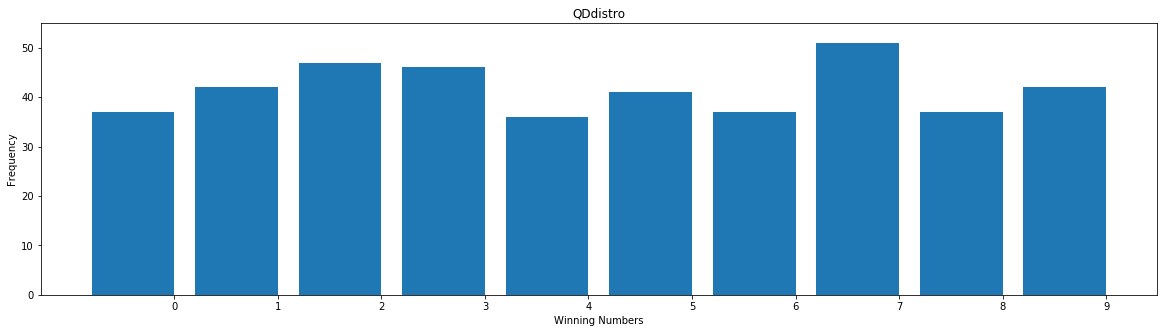

In [9]:
plot_bar("win4num(2020).txt",55)
#savefig("Winning Numbers", bbox_inches = "tight")

# Finding the most probable sum

In [5]:
import pandas as pd

In [58]:
data = pd.read_excel("Win4.xlsx")
data.head(13)

,Date,Game,Numbers,Sum,Daily Average,Two Day Average
0,2020-01-01,Miday,5479,25,NaN,NaN
1,2020-01-01,Evening,5737,22,23.5,NaN
2,2020-01-02,Miday,9493,25,NaN,NaN
3,2020-01-02,Evening,7122,12,18.5,21.0
4,2020-01-03,Miday,5571,18,NaN,NaN
5,2020-01-03,Evening,3583,19,18.5,NaN
6,2020-01-04,Miday,1172,11,NaN,NaN
7,2020-01-04,Evening,9393,24,17.5,18.0
8,2020-01-05,Miday,284,14,NaN,NaN
9,2020-01-05,Evening,4149,18,16.0,NaN


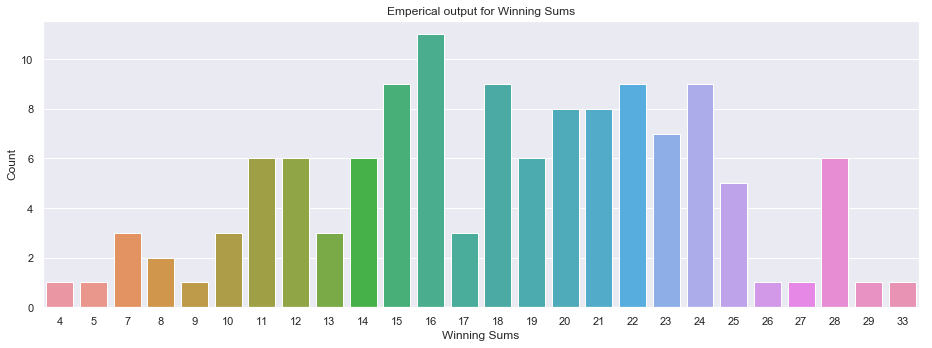

In [60]:
sn.countplot(data["Sum"])
plt.xlabel("Winning Sums")
plt.ylabel("Count")
plt.title("Emperical output for Winning Sums")
sn.set(rc={'figure.figsize':(15.7,5.27)})

Despite the fact that the mode is 16 alot of the numbers seem to cluster from 18 to the mid 20s

In [61]:
rang = data["Sum"].rolling(window = 50,min_periods = 0).mean() 

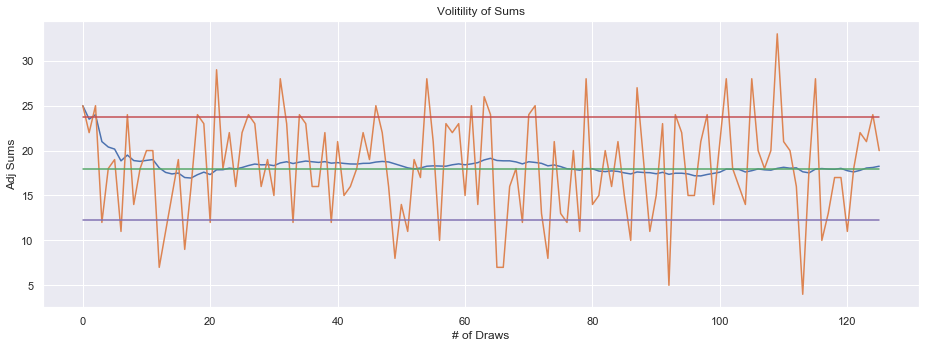

In [173]:
sn.lineplot(x=range(0,len(data)), y = rang,        data = data);
sn.lineplot(x=range(0,len(data)), y = data["Sum"], data = data);
sn.lineplot(x=range(0,len(data)), y = 18,          data = data);
sn.lineplot(x=range(0,len(data)), y = st.stdev(data["Sum"])+18, data = data);
sn.lineplot(x=range(0,len(data)), y =-st.stdev(data["Sum"])+18, data = data);

plt.xlabel("# of Draws")
plt.ylabel("Adj Sums")# 18 - sum
plt.title("Volitility of Sums")
sn.set(rc={'figure.figsize':(15.7,5.27)})

In [153]:
from sklearn.linear_model import LinearRegression

In [155]:
X = []
for i in data["Sum"]:
        X.append([i])
X = np.array(X)
y = np.dot(X, np.array([range(0,len(X))]))

In [156]:
reg = LinearRegression().fit(X,y)

Most of the sums fall with in one standard deviation of the mean

Since we know the average is bottle necking to 18 and that our data is normally distributed then we can attempt to find the next number in our sequnce of sum using the usual definition of average:

$$\frac{1}{n}\sum_{i = 1}^{n}x_{i} = 18 $$
rearanging for the next number in the sequence we get 
$$18n - \sum_{i = 1}^{n-1}x_{i} = x_{n}$$

In [1]:
((len(data["Sum"])+1)*18) - sum(data["Sum"]) #it was one 6,8,12,2,0,0,-17,-22,-20,-20,-6,-16,-8,-1,-1

NameError: name 'data' is not defined

In [15]:
data["Sum"].describe()

count    120.000000
mean      18.158333
std        5.784645
min        4.000000
25%       14.000000
50%       18.000000
75%       22.250000
max       33.000000
Name: Sum, dtype: float64

# AutoCorrelation to recognize patterns in the winnings

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

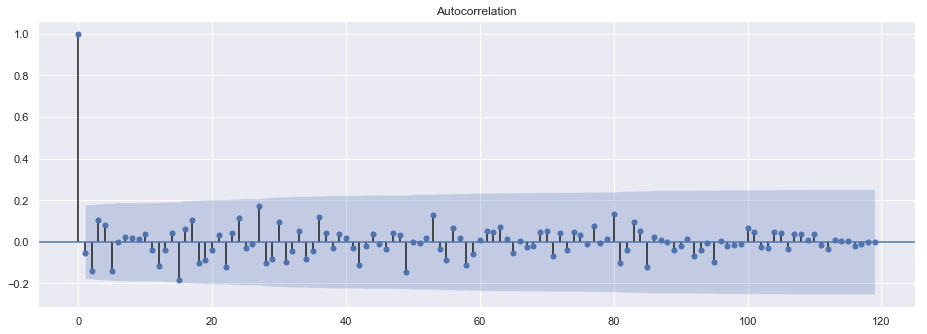

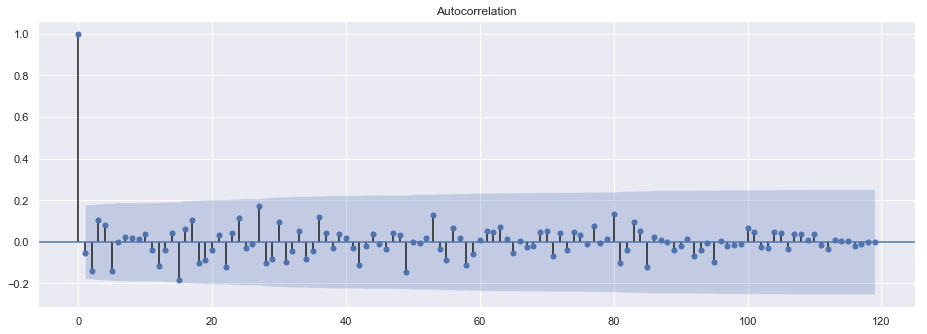

In [53]:
plot_acf (data["Sum"])

# Breaking down the Sum

Once we've done the math to find the highest probable sum we can then break down that sum into the their corresponding drawings. 

In [16]:
from itertools import product

In [17]:
prod = product ([0,1,2,3,4,5,6,7,8,9],repeat = 4)

In [18]:
x = []
for i in (prod):
    if sum(i) == 18:
        x.append(i)
    elif sum(i) == 19:
        x.append(i)
    elif sum(i) == 20:
        x.append(i)
    elif sum(i) == 21:
        x.append(i)
    elif sum(i) == 22:
        x.append(i)
    elif sum(i) == 23:
        x.append(i)

In [19]:
len(x)

3575

# Finding the probability of the first number

# Filtering the Winning Numbers

Doing a bit of data cleaning we turn our winning numbers from the excel sheet from numbers into split tuples.

In [20]:
Numbers_str = []
for i in range(len(data["Numbers"])):
    Numbers_str.append(str(data["Numbers"][i]))
for i in range(len(Numbers_str)):
    while len(Numbers_str[i]) < 4:
        Numbers_str[i] = '0' + Numbers_str[i] 

In [21]:
for i in range(len(Numbers_str)):
    Numbers_str[i] = list(Numbers_str[i])
    for j in range(len(Numbers_str[i])):
        Numbers_str[i][j] = int(Numbers_str[i][j])
for i in range(len(Numbers_str)):
    Numbers_str[i] = tuple(Numbers_str[i])
Numbers_str.sort()
Numbers_str

[(0, 0, 3, 8),
 (0, 1, 6, 0),
 (0, 2, 0, 2),
 (0, 2, 2, 9),
 (0, 2, 8, 4),
 (0, 3, 8, 9),
 (0, 4, 7, 0),
 (0, 9, 8, 6),
 (1, 0, 2, 9),
 (1, 0, 4, 3),
 (1, 1, 7, 2),
 (1, 2, 4, 7),
 (1, 3, 5, 3),
 (1, 5, 2, 7),
 (1, 5, 5, 5),
 (1, 7, 6, 1),
 (1, 7, 7, 0),
 (1, 7, 9, 3),
 (1, 9, 1, 5),
 (2, 0, 3, 6),
 (2, 0, 6, 7),
 (2, 1, 1, 3),
 (2, 1, 2, 2),
 (2, 2, 0, 1),
 (2, 2, 4, 8),
 (2, 3, 9, 6),
 (2, 4, 1, 1),
 (2, 6, 0, 2),
 (2, 6, 3, 1),
 (2, 7, 0, 4),
 (2, 8, 0, 4),
 (2, 9, 8, 9),
 (3, 1, 7, 6),
 (3, 1, 9, 8),
 (3, 2, 1, 7),
 (3, 2, 5, 7),
 (3, 2, 9, 2),
 (3, 3, 4, 0),
 (3, 4, 1, 8),
 (3, 5, 8, 3),
 (3, 6, 2, 1),
 (3, 6, 8, 4),
 (3, 7, 3, 1),
 (3, 8, 9, 8),
 (3, 9, 8, 4),
 (4, 0, 5, 7),
 (4, 1, 4, 8),
 (4, 1, 4, 9),
 (4, 2, 3, 7),
 (4, 2, 6, 9),
 (4, 3, 2, 0),
 (4, 3, 2, 6),
 (4, 3, 4, 7),
 (4, 3, 8, 8),
 (4, 6, 3, 6),
 (4, 9, 5, 4),
 (5, 0, 4, 5),
 (5, 0, 6, 8),
 (5, 0, 9, 7),
 (5, 1, 8, 9),
 (5, 2, 6, 3),
 (5, 2, 7, 8),
 (5, 4, 7, 9),
 (5, 4, 8, 7),
 (5, 5, 1, 7),
 (5, 5, 2, 3),
 (5, 5, 7,

In [22]:
winning_num = []
for i in range(len(x)):
    for j in range(len(Numbers_str)):
        if x[i] == Numbers_str[j]:
            winning_num.append(x[i])
#winning_num # Winning numbers of sums 18,19,20,21

In [23]:
 # winning numbers with sums 18,19,20,21,22

In [24]:
i = 0
while i < len(winning_num):# filtering winning numbers from the generated numbers
    x.remove(winning_num[i])
    i = i + 1

In [25]:
#len(x)

In [26]:
zero_1 = []
one_1  = []
two_1  = []
three_1= []
four_1 = []
five_1 = []
six_1  = []
seven_1= []
eight_1= []
nine_1 = []
for i in x:
    if i[0] == 0:
        zero_1.append(i)
    elif i[0] == 1:
        one_1.append(i)
    elif i[0] == 2:
        two_1.append(i)
    elif i[0] == 3:
        three_1.append(i)
    elif i[0] == 4:
        four_1.append(i)
    elif i[0] == 5:
        five_1.append(i)
    elif i[0] == 6:
        six_1.append(i)
    elif i[0] == 7:
        seven_1.append(i)
    elif i[0] == 8:
        eight_1.append(i)
    elif i[0] == 9:
        nine_1.append(i)

In [27]:
zero_2 = []
one_2  = []
two_2  = []
three_2= []
four_2 = []
five_2 = []
six_2  = []
seven_2= []
eight_2= []
nine_2 = []
for i in x:
    if i[1] == 0:
        zero_2.append(i)
    elif i[1] == 1:
        one_2.append(i)
    elif i[1] == 2:
        two_2.append(i)
    elif i[1] == 3:
        three_2.append(i)
    elif i[1] == 4:
        four_2.append(i)
    elif i[1] == 5:
        five_2.append(i)
    elif i[1] == 6:
        six_2.append(i)
    elif i[1] == 7:
        seven_2.append(i)
    elif i[1] == 8:
        eight_2.append(i)
    elif i[1] == 9:
        nine_2.append(i)

In [28]:
zero_3 = []
one_3  = []
two_3  = []
three_3= []
four_3 = []
five_3 = []
six_3  = []
seven_3= []
eight_3= []
nine_3 = []
for i in x:
    if i[2] == 0:
        zero_3.append(i)
    elif i[2] == 1:
        one_3.append(i)
    elif i[2] == 2:
        two_3.append(i)
    elif i[2] == 3:
        three_3.append(i)
    elif i[2] == 4:
        four_3.append(i)
    elif i[2] == 5:
        five_3.append(i)
    elif i[2] == 6:
        six_3.append(i)
    elif i[2] == 7:
        seven_3.append(i)
    elif i[2] == 8:
        eight_3.append(i)
    elif i[2] == 9:
        nine_3.append(i)

In [29]:
zero_4 = []
one_4  = []
two_4  = []
three_4= []
four_4 = []
five_4 = []
six_4  = []
seven_4= []
eight_4= []
nine_4 = []
for i in x:
    if i[3] == 0:
        zero_4.append(i)
    elif i[3] == 1:
        one_4.append(i)
    elif i[3] == 2:
        two_4.append(i)
    elif i[3] == 3:
        three_4.append(i)
    elif i[3] == 4:
        four_4.append(i)
    elif i[3] == 5:
        five_4.append(i)
    elif i[3] == 6:
        six_4.append(i)
    elif i[3] == 7:
        seven_4.append(i)
    elif i[3] == 8:
        eight_4.append(i)
    elif i[3] == 9:
        nine_4.append(i)

In [30]:
probabilities_first = array([len(zero_1)/len(x),
                                 len(one_1)/len(x), 
                                 len(two_1)/len(x), 
                                 len(three_1)/len(x), 
                                 len(four_1)/len(x), 
                                 len(five_1)/len(x), 
                                 len(six_1)/len(x), 
                                 len(seven_1)/len(x), 
                                 len(eight_1)/len(x),
                                 len(nine_1)/len(x)])
probabilities_first

array([0.05604302, 0.06991226, 0.08349844, 0.0956694 , 0.10585904,
       0.11236909, 0.11972828, 0.12227569, 0.12001132, 0.11463346])

In [31]:
probabilities_second = array([len(zero_2)/len(x),
                                  len(one_2)/len(x), 
                                  len(two_2)/len(x), 
                                  len(three_2)/len(x), 
                                  len(four_2)/len(x), 
                                  len(five_2)/len(x), 
                                  len(six_2)/len(x), 
                                  len(seven_2)/len(x), 
                                  len(eight_2)/len(x),
                                  len(nine_2)/len(x)])
probabilities_second

array([0.05519389, 0.06934616, 0.08293235, 0.09482027, 0.10670818,
       0.11435041, 0.11944523, 0.12142655, 0.1211435 , 0.11463346])

In [32]:
probabilities_third = array([len(zero_3)/len(x),
                                 len(one_3)/len(x), 
                                 len(two_3)/len(x), 
                                 len(three_3)/len(x), 
                                 len(four_3)/len(x), 
                                 len(five_3)/len(x),
                                 len(six_3)/len(x), 
                                 len(seven_3)/len(x), 
                                 len(eight_3)/len(x),
                                 len(nine_3)/len(x)])

probabilities_third

array([0.05632607, 0.06962921, 0.08264931, 0.09538636, 0.10670818,
       0.11463346, 0.12057741, 0.12086046, 0.11887914, 0.11435041])

In [33]:
probabilities_fourth = array([len(zero_4)/len(x),
                                 len(one_4)/len(x), 
                                 len(two_4)/len(x), 
                                 len(three_4)/len(x), 
                                 len(four_4)/len(x), 
                                 len(five_4)/len(x),
                                 len(six_4)/len(x), 
                                 len(seven_4)/len(x), 
                                 len(eight_4)/len(x),
                                 len(nine_4)/len(x)])

probabilities_fourth

array([0.05547693, 0.06991226, 0.08293235, 0.09538636, 0.105576  ,
       0.11604868, 0.12001132, 0.12029437, 0.11972828, 0.11463346])

In [34]:
num = [0,1,2,3,4,5,6,7,8,9]
probabilty_first = dict (zip(num,probabilities_first))
probabilty_second = dict (zip(num,probabilities_second))
probabilty_third = dict (zip(num,probabilities_third))
probabilty_fourth = dict (zip(num,probabilities_fourth))

In [35]:
from random import choice

In [36]:
rand_draw = x[random.choice(len(x))]
rand_draw

(5, 4, 4, 5)

In [37]:
p = 1
P = []
for i in range(len(x)):
     P.append(100*probabilty_first.get(x[i][0])*probabilty_second.get(x[i][1])*probabilty_third.get(x[i][2])*probabilty_fourth.get(x[i][3])) 

P

[0.0040547271980718915,
 0.0052961592876567334,
 0.005320818653652173,
 0.005094400838603144,
 0.006439337071312164,
 0.006615275242659491,
 0.006333774168503768,
 0.006393351115415034,
 0.006363264757224845,
 0.006092487533513149,
 0.007345139863376993,
 0.0076895989524315535,
 0.007362381975732338,
 0.0075993013714298575,
 0.007563539953211363,
 0.007292604637089349,
 0.007309804176327768,
 0.007275405097850931,
 0.006965813391559402,
 0.00785854305962943,
 0.008633401873245567,
 0.008266023070128733,
 0.008694583763123006,
 0.008653668074825956,
 0.008285426880152512,
 0.008531927133417522,
 0.008552049603071809,
 0.008511804663763235,
 0.008149600209986075,
 0.007935918746514368,
 0.008206901337858761,
 0.008226257237240502,
 0.008187545438477018,
 0.007839139249605654,
 0.007839139249605654,
 0.008795638998894408,
 0.008421356488303156,
 0.009295452474972026,
 0.009251709169207452,
 0.008858019417326283,
 0.009295349791155679,
 0.00931727278594614,
 0.009273426796365216,
 0.008878

In [38]:
rank  = zip (x,P)
rank  = dict(rank)
for i in x:
    if rank[i] == max(rank.values()):
        print (i)

(6, 6, 6, 5)


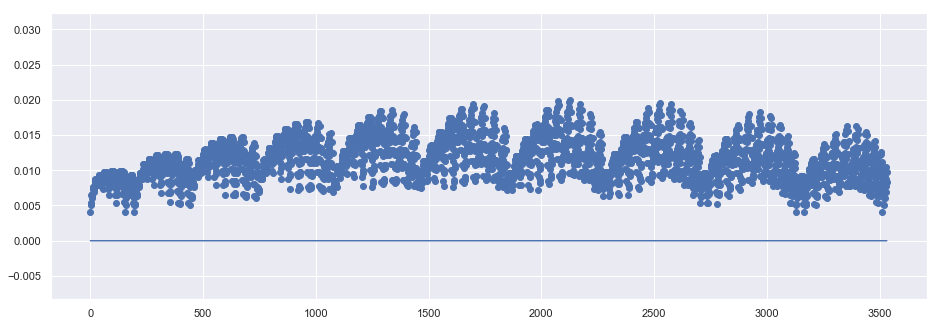

In [42]:
plt.scatter(range(len(rank.keys())) ,rank.values())
sn.lineplot(range(len(rank.keys())) ,y = 0);

# Probability of each Sequence 

In [40]:
rank

{(0, 0, 9, 9): 0.0040547271980718915,
 (0, 1, 8, 9): 0.0052961592876567334,
 (0, 1, 9, 8): 0.005320818653652173,
 (0, 1, 9, 9): 0.005094400838603144,
 (0, 2, 7, 9): 0.006439337071312164,
 (0, 2, 8, 8): 0.006615275242659491,
 (0, 2, 8, 9): 0.006333774168503768,
 (0, 2, 9, 7): 0.006393351115415034,
 (0, 2, 9, 8): 0.006363264757224845,
 (0, 2, 9, 9): 0.006092487533513149,
 (0, 3, 6, 9): 0.007345139863376993,
 (0, 3, 7, 8): 0.0076895989524315535,
 (0, 3, 7, 9): 0.007362381975732338,
 (0, 3, 8, 7): 0.0075993013714298575,
 (0, 3, 8, 8): 0.007563539953211363,
 (0, 3, 9, 6): 0.007292604637089349,
 (0, 3, 9, 7): 0.007309804176327768,
 (0, 3, 9, 8): 0.007275405097850931,
 (0, 3, 9, 9): 0.006965813391559402,
 (0, 4, 5, 9): 0.00785854305962943,
 (0, 4, 6, 8): 0.008633401873245567,
 (0, 4, 6, 9): 0.008266023070128733,
 (0, 4, 7, 7): 0.008694583763123006,
 (0, 4, 7, 8): 0.008653668074825956,
 (0, 4, 7, 9): 0.008285426880152512,
 (0, 4, 8, 6): 0.008531927133417522,
 (0, 4, 8, 7): 0.008552049603071809